<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/13_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeansClustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

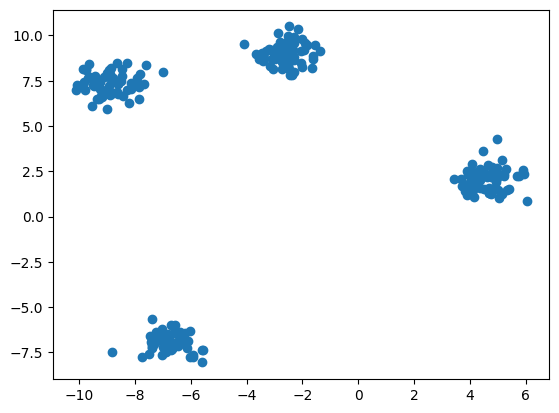

In [40]:
X, _ = make_blobs(n_samples=250, centers=4, cluster_std=0.6, random_state=42)
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [53]:
kmeans.inertia_

171.06091730994075

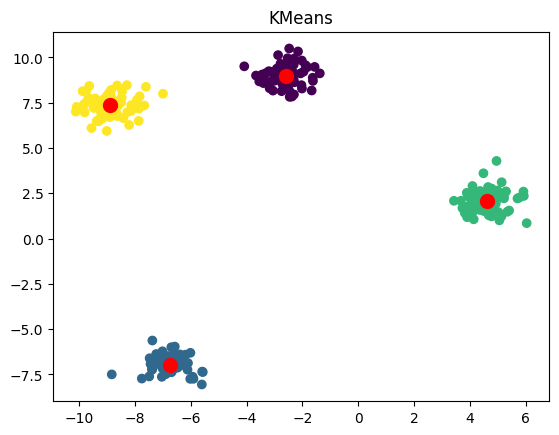

In [42]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap= "viridis")
plt.scatter(centers[:, 0], centers[:, 1], c ="red", linewidths=5)
plt.title("KMeans")
plt.show()

## Hierarchical Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.5, random_state=42)

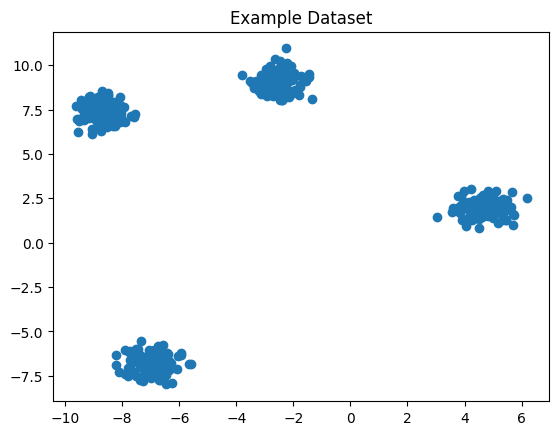

In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Example Dataset")
plt.show()

In [8]:
linkage_methods = ["single", "ward", "average", "complete"]

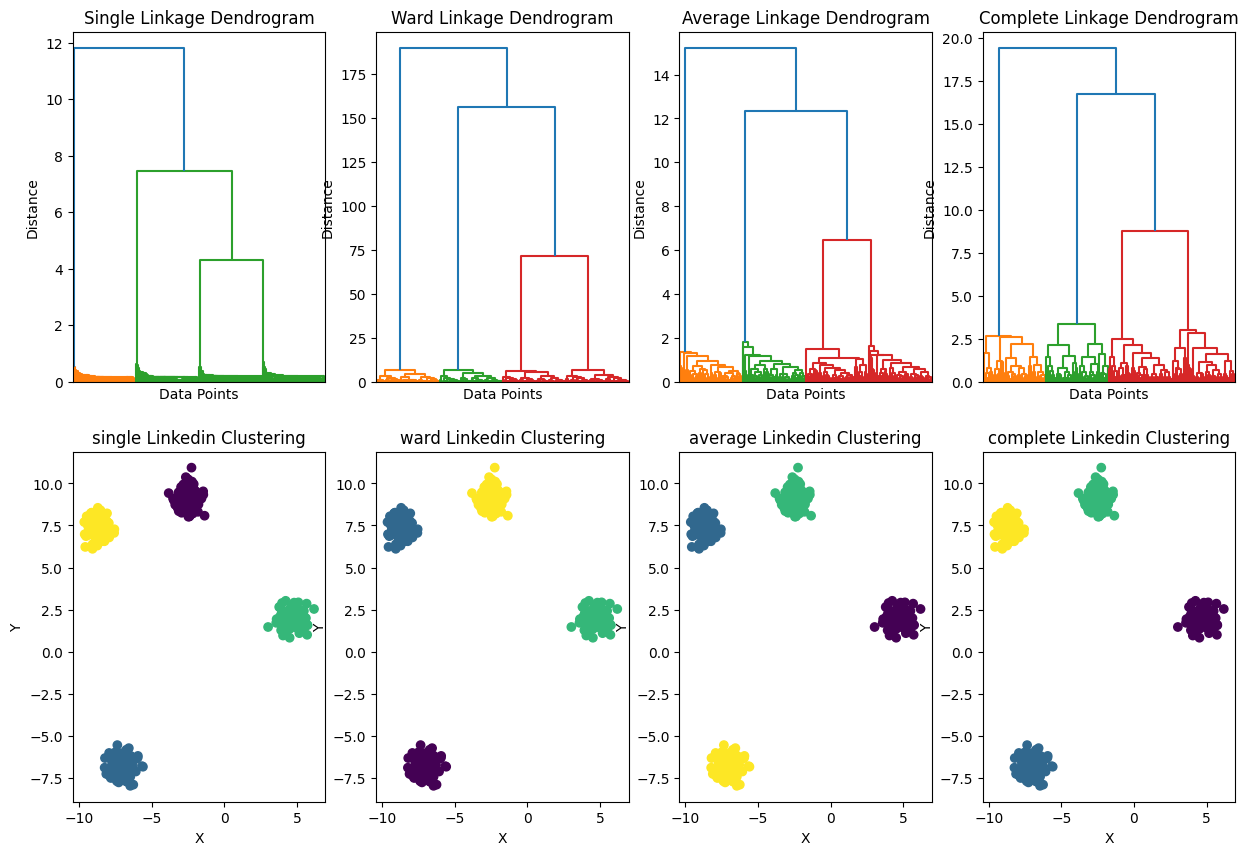

In [11]:
plt.figure(figsize=(15,10))
for i, method in enumerate(linkage_methods, 1):
  model = AgglomerativeClustering(n_clusters=4, linkage=method)
  cluster_labels = model.fit_predict(X)

  plt.subplot(2, 4, i)
  plt.title(f"{method.capitalize()} Linkage Dendrogram")
  dendrogram(linkage(X, method=method), no_labels=True)
  plt.xlabel("Data Points")
  plt.ylabel("Distance")

  plt.subplot(2, 4, i+4)
  plt.scatter(X[:, 0], X[:, 1], c =cluster_labels, cmap="viridis")
  plt.title(f"{method} Linkedin Clustering")
  plt.xlabel("X")
  plt.ylabel("Y")

## DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [20]:
X, _ = make_circles(1000 , factor=0.5, noise = 0.05)

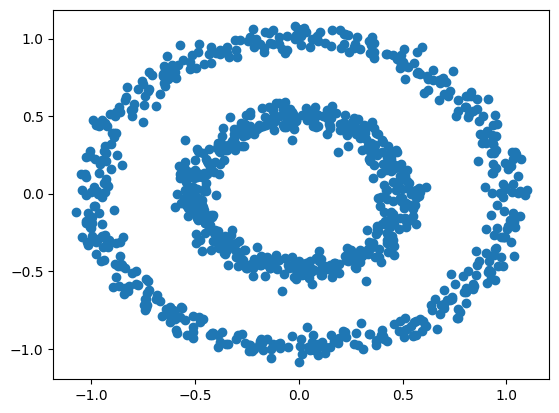

In [21]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [24]:
dbscan = DBSCAN(eps = 0.1, min_samples=4)
cluster_labels = dbscan.fit_predict(X)

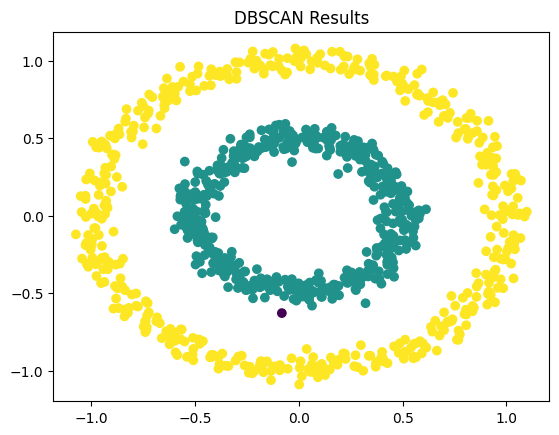

In [27]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap="viridis")
plt.title("DBSCAN Results")
plt.show()

## Clustering Algorithms Comparison

In [34]:
from sklearn import datasets, cluster
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

In [36]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_circles(n_samples=n_samples)
no_structure = np.random.rand(n_samples, 2), None

In [56]:
clustering_names = ["MiniBatchKMeans", "SpectralClustering", "Ward",
                    "AgglomerativeClustering", "DBSCAN", "Birch"]

colors = np.array(["b", "g", "r", "c", "m", "y"])
datasets = [noisy_circles, noisy_moons, blobs, no_structure]

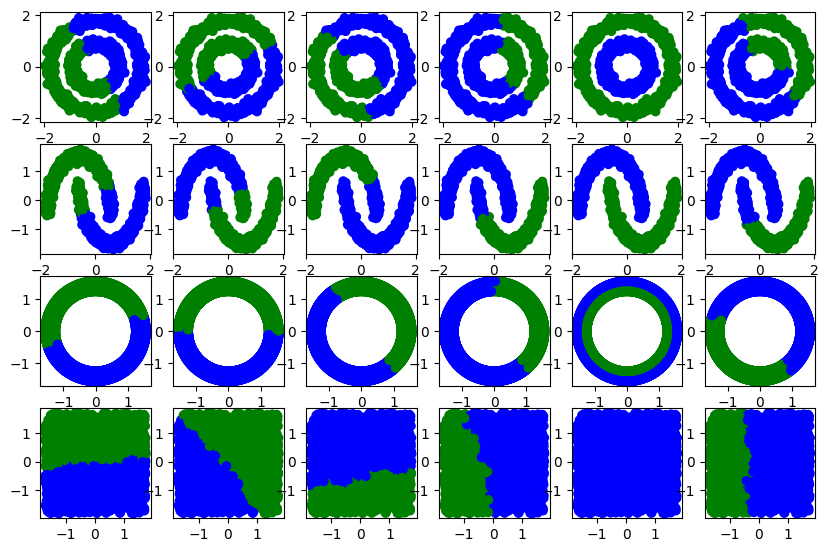

In [58]:
plt.figure(figsize=(10,10))
i = 1
for j, dataset in enumerate(datasets):
  X, y = dataset
  X = StandardScaler().fit_transform(X)

  two_means = cluster.MiniBatchKMeans(n_clusters=2, n_init=10)
  spectral = cluster.SpectralClustering(n_clusters=2)
  ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")
  average_linkage = cluster.AgglomerativeClustering(n_clusters=2, linkage="average")
  dbscan = cluster.DBSCAN(eps = 0.2)
  birch = cluster.Birch(n_clusters = 2)

  clustering_algorithms = [two_means, spectral, ward, average_linkage, dbscan, birch]

  for name, algo in zip(clustering_names, clustering_algorithms):

    model =  algo.fit(X)
    if hasattr(model, "labels_"):
      y_pred = model.labels_.astype(int)
    else:
      y_pred = model.predict(X)

    plt.subplot(len(clustering_names), len(clustering_algorithms), i)
    plt.scatter(X[:, 0], X[:, 1], c = colors[y_pred].tolist())

    i += 1